In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from seaborn import pairplot
import seaborn as sns
from matplotlib import pylab
import numpy as np
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24
 }
pylab.rcParams.update(params)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#@title visualize_clf
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

In [36]:
#@title Q1
virus_data=pd.read_csv("https://raw.githubusercontent.com/NoaDickman/virus_data/main/virus_data.csv")
virus_data.shape

(1250, 26)

In [37]:
#@title Q2
virus_data['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

Q3

In [38]:
virus_data.dtypes
virus_data.symptoms.head

<bound method NDFrame.head of 0               low_appetite;sore_throat
1                           low_appetite
2                                    NaN
3                                    NaN
4                            sore_throat
                      ...               
1245                        low_appetite
1246                                 NaN
1247    low_appetite;shortness_of_breath
1248                         sore_throat
1249            low_appetite;sore_throat
Name: symptoms, Length: 1250, dtype: object>

In [39]:
#@title Q4

trainingSet,testSet=model_selection.train_test_split(virus_data, train_size=0.8, test_size=0.2, random_state=69)
display(trainingSet)
display(testSet)

patient_id  age sex  weight blood_type           current_location  \
283          529   23   M    75.8         O+    ('6.84019', '79.87116')   
801         1197   21   F    60.6         B+    ('51.88333', '8.51667')   
640         1479   40   M    77.9         O-   ('65.93381', '111.4834')   
950          521   29   F    65.1         A+    ('5.4709', '100.24529')   
333         1003   17   F    50.5         O+    ('2.41669', '30.98551')   
...          ...  ...  ..     ...        ...                        ...   
404         1700   60   M    72.4         O+  ('43.82634', '144.09638')   
439         1976   19   M   104.2         A+       ('52.09', '5.23333')   
619         1675    8   M    13.5         A+    ('-13.7804', '34.4587')   
1227        1612   46   F    61.0         O+    ('45.73333', '4.91667')   
1078        1557   32   M    76.4         A+  ('37.60876', '-77.37331')   

      num_of_siblings  happiness_score  household_income  \
283                 2                9             650.1   
801                 3                7             345.7   
640                 0                8             797.3   
950                 3                8             480.2   
333                 2                6             743.4   
...               ...              ...               ...   
404                 2                9             824.8   
439                 1                8             292.7   
619                 3                7            1194.2   
1227                3                8            1040.2   
1078                4                7             775.7   

      conversations_per_day  ...      PCR_03      PCR_04    PCR_05     PCR_06  \
283                       1  ...   72.826651   50.294978  3.385267  12.005077   
801                       2  ...  116.731322  234.245341  5.511893  29.988936   
640                       4  ...  269.438843   88.824292  9.241105  12.155326   
950                       0  ...   83.676804  186.279183  7.253977  16.087360   
333                       4  ...  212.506037   77.263212  3.861682  20.178274   
...                     ...  ...         ...         ...       ...        ...   
404                       1  ...   51.699416  238.584270  4.736672   7.878707   
439                       1  ...  276.383885  169.905250  1.514218   9.807008   
619                       1  ...  220.398212  188.535367  4.387945  18.103134   
1227                      2  ...  140.478872  197.204523  9.012532  14.332868   
1078                      3  ...  348.922438  280.673860  3.437785  13.902117   

         PCR_07    PCR_08    PCR_09     PCR_10  spread  risk  
283  -17.202069  6.396506 -8.047311 -30.212600      -1     1  
801  -21.651993  7.108760 -1.155408 -56.865261      -1     1  
640  -19.421620  3.410029  1.928803 -54.844678      -1     1  
950  -15.855845  9.777477  0.793707 -52.603031      -1    -1  
333   -6.633818  4.533855 -8.007810 -42.431182       1     1  
...         ...       ...       ...        ...     ...   ...  
404  -16.751779  5.133577  4.678812 -36.875237       1     1  
439    3.483366  2.682181  6.068818 -13.934213       1    -1  
619  -11.865935  1.307492 -9.020904 -37.126121      -1    -1  
1227   4.060401  0.853416 -4.041687 -62.316305      -1     1  
1078   9.984521  4.382447  4.271983 -28.369795       1    -1  

[1000 rows x 26 columns]

patient_id  age sex  weight blood_type            current_location  \
872        1920   28   M    67.0         A+    ('46.32313', '-0.45877')   
475        1179   18   F    51.4         B+  ('34.14251', '-118.25508')   
433        1849    6   F    37.0         A+    ('44.75874', '19.21437')   
572        1508   20   M    69.8         O+   ('10.29085', '105.75635')   
112         933   36   M    89.3         B+      ('7.50251', '5.06258')   
..          ...  ...  ..     ...        ...                         ...   
51         1752   42   F    74.0         O+       ('53.43333', '-7.95')   
582         600   18   M    58.0         O+        ('53.63333', '9.85')   
482        1639   36   F    64.3         O+          ('42', '21.32778')   
807         299   12   F    35.2         B+   ('36.19278', '117.65694')   
166         692    3   M    39.2         A+     ('41.1053', '-7.32097')   

     num_of_siblings  happiness_score  household_income  \
872                0                8             258.2   
475                2               10            1474.0   
433                2               10             591.1   
572                0                7             660.6   
112                0                7             792.9   
..               ...              ...               ...   
51                 1                8             623.1   
582                1               10             457.2   
482                3               10             646.1   
807                3               10             653.8   
166                3                6             358.2   

     conversations_per_day  ...      PCR_03      PCR_04    PCR_05     PCR_06  \
872                      7  ...   46.931625  238.592743  6.142859  10.196310   
475                      3  ...   93.112156  354.366694  6.566528   9.811163   
433                      9  ...   76.271884   35.838972  5.408925   6.098136   
572                      0  ...    7.419259  325.756050  6.642552   5.908692   
112                      8  ...  236.211170  112.784646  8.737671   7.978598   
..                     ...  ...         ...         ...       ...        ...   
51                       4  ...   93.101872  123.328373  7.822863  12.227339   
582                      5  ...  152.924287  351.068341  9.134638  11.542135   
482                      2  ...  214.485359  349.196451  2.033795  11.665292   
807                      1  ...  269.048283   92.351950  3.927018  11.746389   
166                      4  ...  336.181500  104.300202  2.124382   9.950696   

        PCR_07     PCR_08     PCR_09     PCR_10  spread  risk  
872 -15.782854  10.115671  -1.767524 -42.938930      -1    -1  
475  -9.553099  13.641768  -8.115007 -43.924858      -1    -1  
433 -13.051707   3.918757  -8.920377 -32.172435      -1    -1  
572  10.147579   4.601479 -11.476203 -39.361523      -1    -1  
112  -1.535786   9.236096  -4.159169 -52.158778       1    -1  
..         ...        ...        ...        ...     ...   ...  
51  -16.124644   4.381401  -0.255204 -48.462716      -1    -1  
582   9.233189   3.605779  -8.522721 -53.859915       1    -1  
482 -12.863066   2.010638   0.511949 -20.126988      -1    -1  
807  11.045784   3.610077  -9.834569 -26.952044      -1    -1  
166  -0.885641   3.498318  -5.145841 -19.282799       1     1  

[250 rows x 26 columns]

In [40]:
#@title Q5
correlationPcr1AndSpread=trainingSet.corr().spread.PCR_01
correlationPcr2AndSpread=trainingSet.corr().spread.PCR_02
correlationPcr9AndSpread=trainingSet.corr().spread.PCR_09
print([correlationPcr1AndSpread,correlationPcr2AndSpread,correlationPcr9AndSpread])


[0.08443202524585723, 0.5086066469110988, -0.021620413561135827]


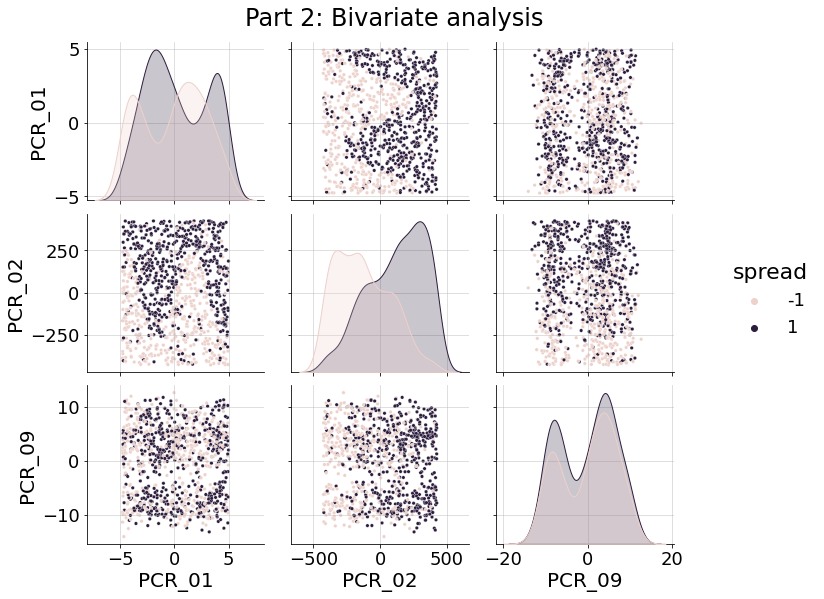

In [41]:
#@title Task - Seebor.pairplot
g=pairplot(trainingSet[["spread","PCR_01","PCR_02","PCR_09"]], plot_kws={"s": 12},hue="spread")
g.fig.suptitle("Part 2: Bivariate analysis", y=1.04)
for ax in np.ravel(g.axes):
 ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [42]:
#@title Task- Implementation of k-NN
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors
    self.train_x = None
    self.train_y = None
 
  def fit(self, X, y):
    self.trainingX = X.copy()
    self.trainingY = y.copy()
    return self
    
  def predict(self, X):
      distances = cdist(X, self.trainingX)
      minDictancesLabels = self.trainingY.to_numpy()[distances.argpartition(self.n_neighbors)]
      predictions = [np.sign(sum(row[:self.n_neighbors])) for row in minDictancesLabels]
      return np.asarray(predictions)



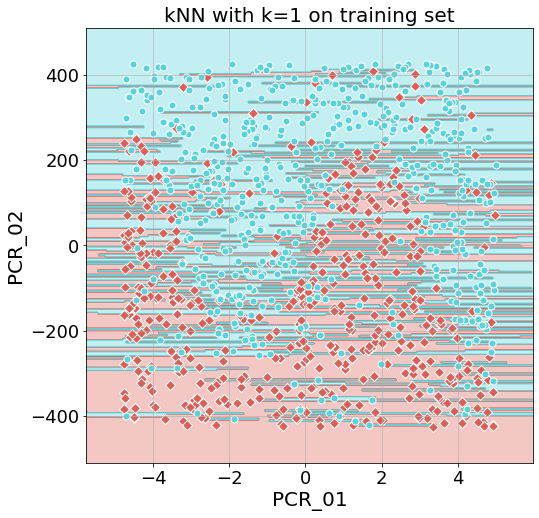

1.0

In [43]:
#@title Task- testing the kNN implempentation

xTraining,yTraining=trainingSet[["PCR_01","PCR_02"]],trainingSet["spread"]
knnTest = kNN(1)
knnTest.fit(xTraining,yTraining)
visualize_clf(knnTest,xTraining,yTraining,"kNN with k=1 on training set","PCR_01","PCR_02")
knnTest.score(xTraining,yTraining)

Q7

The accuracy of the model for the train for N=1 is 1.
The model for k=1 has a perfect fit.
The reason for this is that for k=1 the model checks each point in relation to itself, that is, a perfect classification is performed for each point, regardless of the collection of points.

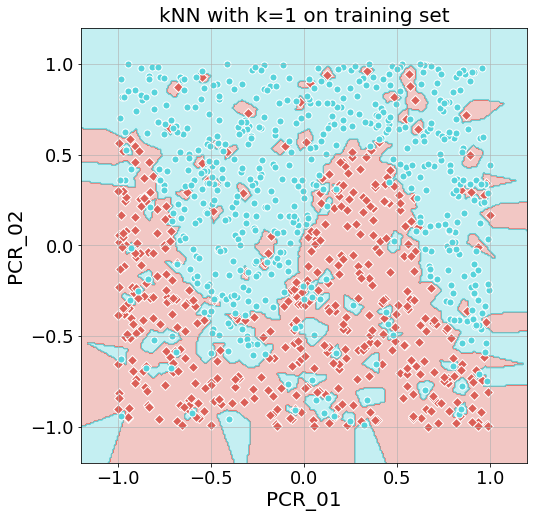

The score of knn with k = 1 after normalization is:  1.0


In [44]:
#@title Q8
Scaler=MinMaxScaler(feature_range=(-1,1))
fittedXTraining=Scaler.fit_transform(xTraining)

knnTestMinMaxFit = kNN(1)
knnTestMinMaxFit.fit(fittedXTraining,yTraining)
visualize_clf(knnTestMinMaxFit,fittedXTraining,yTraining,"kNN with k=1 on training set","PCR_01","PCR_02")
knnTestMinMaxFit.score(fittedXTraining,yTraining)

knn1_scaled = kNN(1).fit(fittedXTraining, yTraining)
print("The score of knn with k = 1 after normalization is: ", knn1_scaled.score(fittedXTraining, yTraining))

The normalization improves the accuracy because we normalized the two features of the base and activated kNN, which means we gave equal weight to each feature. It seems that the KNN model is based on the distance between the neighbors. This distance is directly affected by the size of the variables, normalization is therefore preferable.

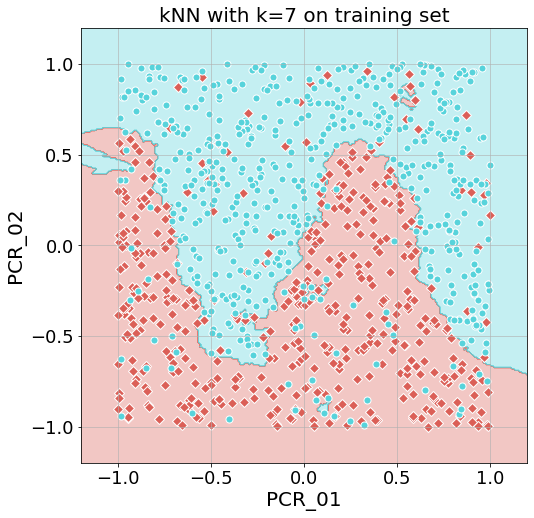

0.881

In [45]:
#@title Q9
knnTestMinMaxFitK7 = kNN(7)
knnTestMinMaxFitK7.fit(fittedXTraining,yTraining)
visualize_clf(knnTestMinMaxFitK7,fittedXTraining,yTraining,"kNN with k=7 on training set","PCR_01","PCR_02")
knnTestMinMaxFitK7.score(fittedXTraining,yTraining)


The kNN=7 model looks better because the separation in it is less noisy, for kNN=1 there is more noise in the direction of weight per exact point. That is, the addition of each new point will be very sensitive and will be classified in a very rigid way to the existing set.
Therefore, the kNN=7 model will probably include better and smooth out noise.

Q10

Normalizing a variable sampled from a normal distribution by min-max is very problematic. This function is based on the maximum and minimum value, these values will be very uncommon, the absolute majority of the values will be distributed around zero. As a result, a very large density of values will be created, which will make classification difficult and harm the results.

Q11

we are needed 8 Boolean features 

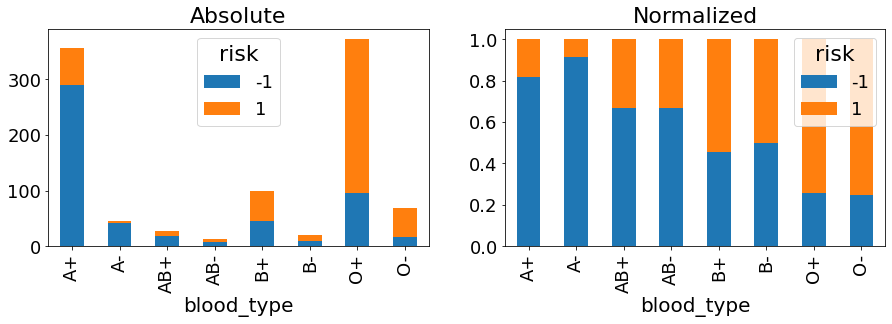

In [46]:
#@title Q12

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,4))
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax1.set_title("Absolute", fontsize=22)
ax2.set_title("Normalized", fontsize=22)

_ = pd.crosstab(trainingSet['blood_type'], trainingSet['risk']).plot(kind='bar', stacked=True, ax=ax1)# TODO: training data?
_ = pd.crosstab(trainingSet['blood_type'], trainingSet['risk'], normalize="index").plot(kind='bar', stacked=True, ax=ax2)



In [47]:
#@title Task new blood type
def replace_blood_type_with_bolean(data):
  data["001"]=(data["blood_type"].isin(["A+","A-"])).astype(int)
  data["010"]=(data["blood_type"].isin(["O+","O-"])).astype(int)
  data["100"]=(data["blood_type"].isin(["AB+","AB-","B+","B-"])).astype(int)
  del data["blood_type"]
replace_blood_type_with_bolean(trainingSet)

In [48]:
#@title Q13
trainingSet=pd.concat([trainingSet,trainingSet['symptoms'].str.get_dummies(sep=';')],axis=1)
del trainingSet["symptoms"]

In [49]:
#@title Make all feature numerical and delete unnecessery features
def fix_other_features(data):
  del data["current_location"]
  del data["pcr_date"]
  data["sex"].replace({"F": 1, "M": -1}, inplace=True)
fix_other_features(trainingSet)


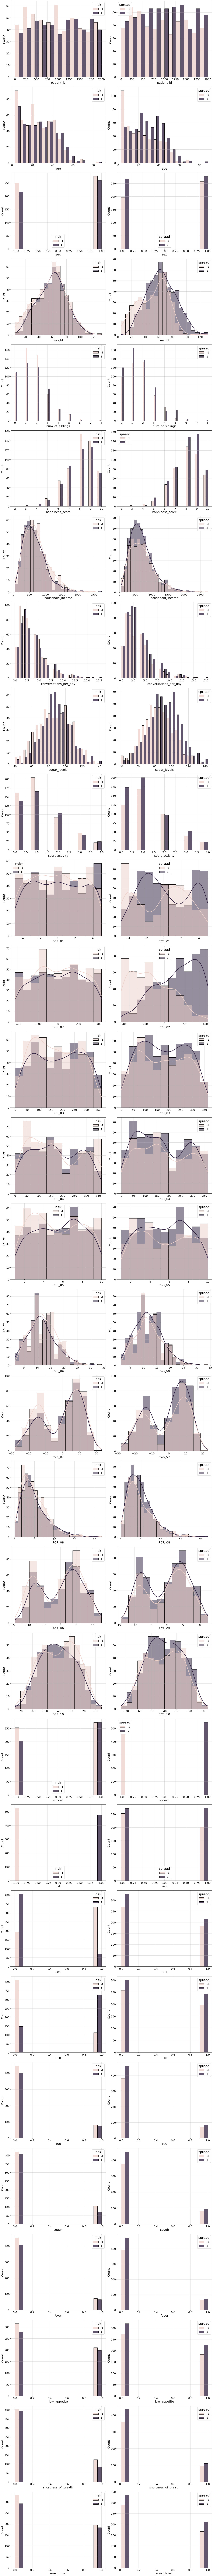

In [50]:
  COL_NAME = trainingSet.columns
  COLS, ROWS = (2, len(COL_NAME))
  plt.figure(figsize=(10 * COLS, 8 * ROWS))
  for row in range(ROWS):
    column = COL_NAME[row]
    for j, cls in enumerate(["risk", "spread"]):
      plt.subplot(ROWS,COLS, row * COLS + 1 + j)
      isContinuous = "float" in trainingSet[column].dtype.name
      sns.histplot(data=trainingSet, x=column, hue=cls, line_kws={"linewidth": 3},
      kde=isContinuous, multiple="layer" if isContinuous else "dodge")
      plt.grid(alpha=0.5)
  plt.tight_layout()


#@title Q16


In [51]:
s = trainingSet.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                     1.000000
001                      0.492249
010                      0.478033
shortness_of_breath      0.076266
household_income         0.073188
cough                    0.069751
weight                   0.060451
spread                   0.056801
PCR_03                   0.055616
PCR_06                   0.053460
age                      0.048503
PCR_05                   0.045079
patient_id               0.044804
PCR_09                   0.043997
sport_activity           0.040655
PCR_01                   0.034268
PCR_07                   0.032980
sex                      0.023587
PCR_10                   0.022264
sugar_levels             0.021299
PCR_08                   0.021066
low_appetite             0.017113
sore_throat              0.014248
100                      0.010706
happiness_score          0.010523
PCR_02                   0.008197
conversations_per_day    0.008071
num_of_siblings          0.005785
PCR_04                   0.003530
fever         

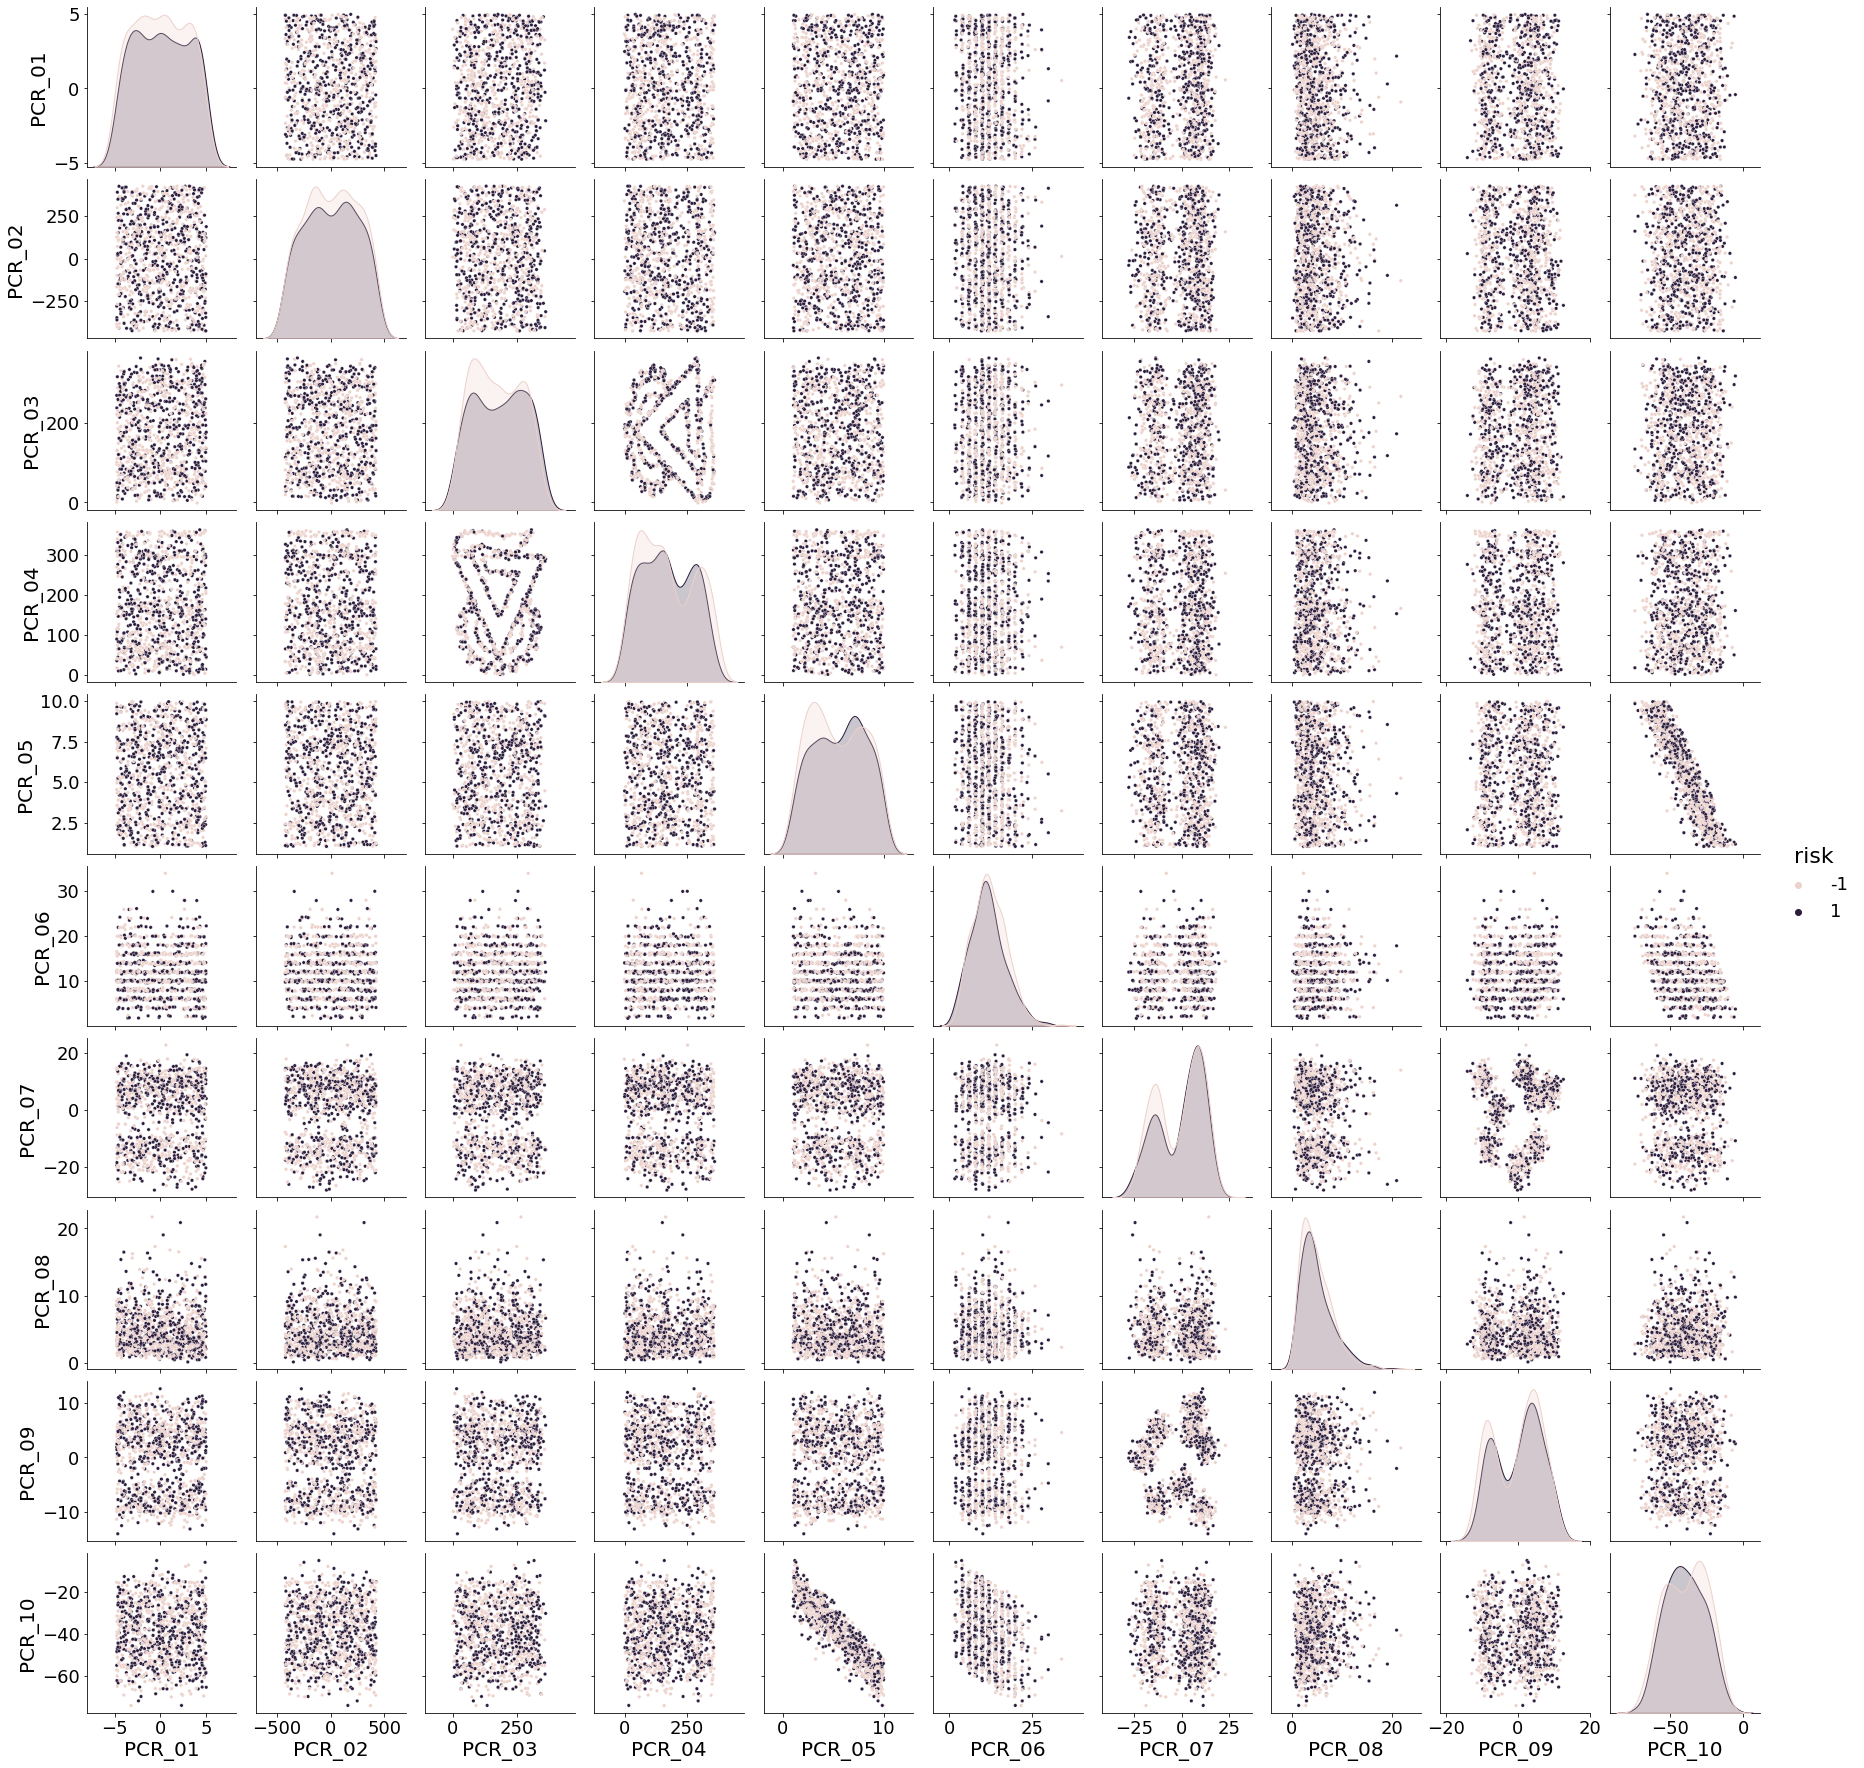

In [52]:
#@title Q17
sns.pairplot(trainingSet[trainingSet.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 12}, hue="risk")

Q18

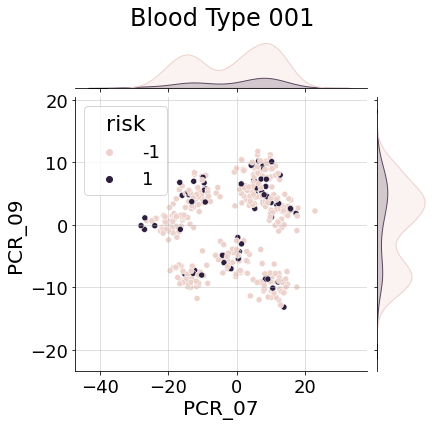

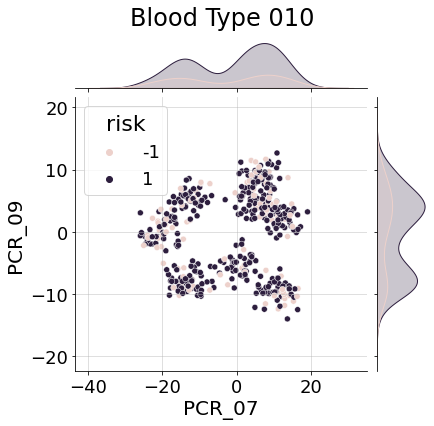

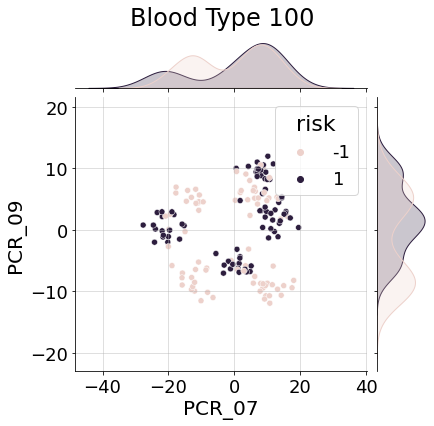

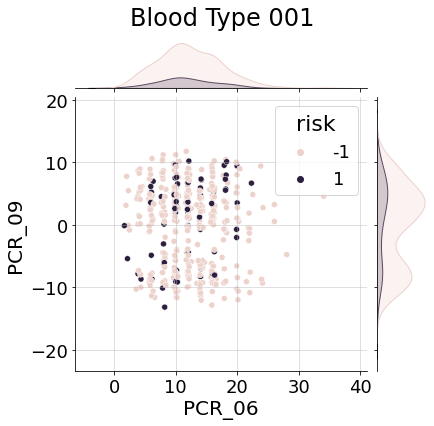

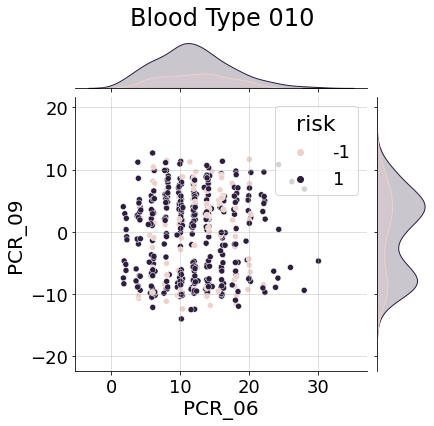

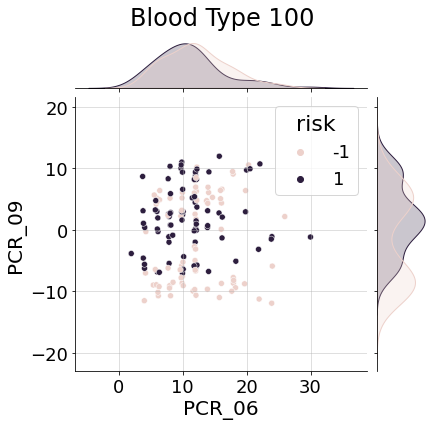

In [53]:

groups = [['PCR_07','PCR_09'],['PCR_06','PCR_09']]#changed for better separation. 
blood_type_001=trainingSet.drop(trainingSet.loc[trainingSet['001']==0].index)
blood_type_010=trainingSet.drop(trainingSet.loc[trainingSet['010']==0].index)
blood_type_100=trainingSet.drop(trainingSet.loc[trainingSet['100']==0].index)
titles=["Blood Type 001","Blood Type 010","Blood Type 100"]
for i,group in enumerate(groups):
  for j,bt in enumerate([blood_type_001,blood_type_010,blood_type_100]):
    g=sns.jointplot(data=bt ,x=group[0],y=group[1], hue="risk")
    _=g.ax_joint.grid(alpha=0.5)
    plt.suptitle(titles[j])
    plt.subplots_adjust(top=0.9)
  


Q21

Before scale:
count    1000.000000
mean       57.743000
std        21.976175
min         5.000000
25%        42.075000
50%        59.550000
75%        72.300000
max       131.000000
Name: weight, dtype: float64


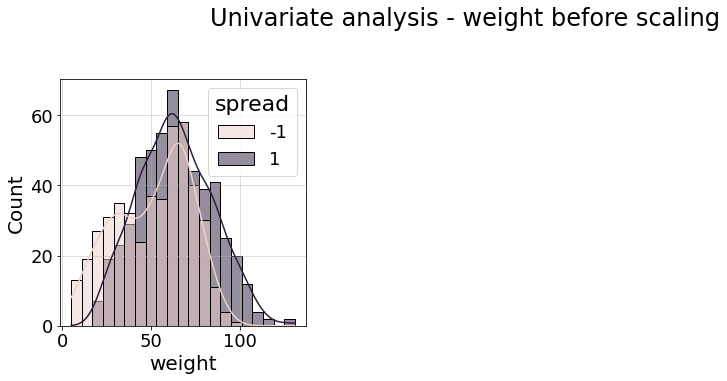

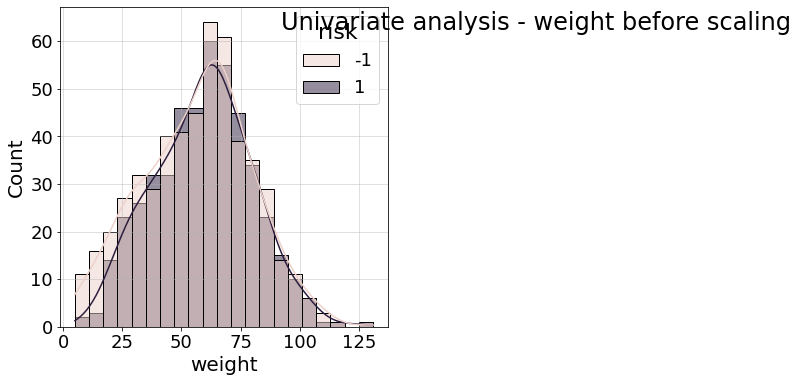

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def Standard_scale(f):
  scaler = StandardScaler()
  scaler.fit(trainingSet[f].values.reshape(-1, 1))
  trainingSet[f] = scaler.transform(trainingSet[f].values.reshape(-1, 1))

def MinMax_scale(f):
  scaler = MinMaxScaler()
  scaler.fit(trainingSet[f].values.reshape(-1, 1))
  trainingSet[f] = scaler.transform(trainingSet[f].values.reshape(-1, 1))

print("Before scale:")
print(trainingSet["weight"].describe())
COL_NAME = ["weight"]
COLS = 3
ROWS = 2
plt.figure(figsize=(15, 5 * ROWS))
train_set_changed2 = trainingSet.copy()
#train_set_changed2['sex'] = train_set_changed2['sex'].astype(str)
for i, column in enumerate(COL_NAME, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=trainingSet, x=column, hue="spread", kde=True)
    plt.suptitle("Univariate analysis - weight before scaling")
    plt.grid(alpha=0.5)

COLS = 3
ROWS = 2
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=trainingSet, x=column, hue="risk", kde=True)
    plt.suptitle("Univariate analysis - weight before scaling")
    plt.grid(alpha=0.5)

plt.tight_layout()

After scaling
count    1.000000e+03
mean    -8.881784e-17
std      1.000500e+00
min     -2.401209e+00
25%     -7.133107e-01
50%      8.226655e-02
75%      6.627306e-01
max      3.335142e+00
Name: weight, dtype: float64


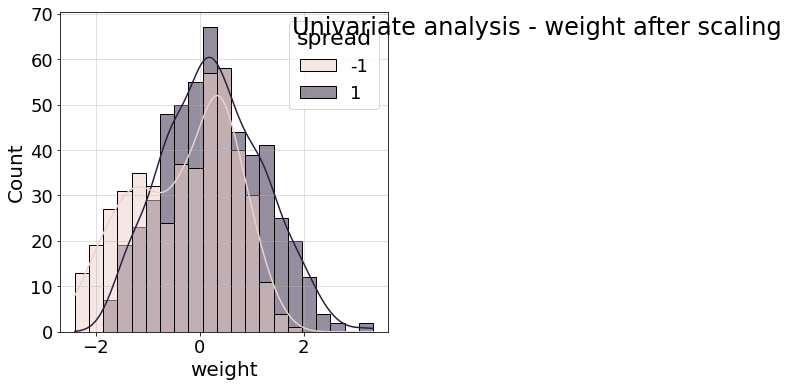

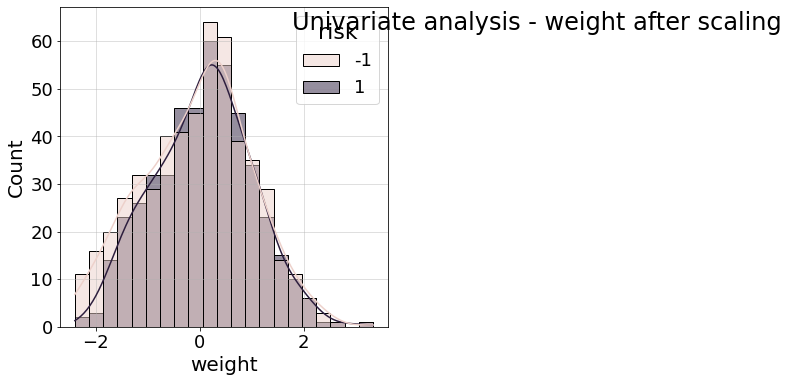

In [55]:
Standard_scale('weight')

print("After scaling")
print(trainingSet["weight"].describe())

COL_NAME = ["weight"]
COLS = 3
ROWS = 2
plt.figure(figsize=(15, 5 * ROWS))
train_set_changed2 = trainingSet.copy()
for i, column in enumerate(COL_NAME, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=trainingSet, x=column, hue="spread", kde=True)
    plt.suptitle("Univariate analysis - weight after scaling")
    plt.grid(alpha=0.5)

plt.tight_layout()

COLS = 3
ROWS = 2
plt.figure(figsize=(15, 5 * ROWS))
for i, column in enumerate(COL_NAME, 1):
    plt.subplot(ROWS,COLS,i)
    sns.histplot(data=trainingSet, x=column, hue="risk", kde=True)
    plt.suptitle("Univariate analysis - weight after scaling")
    plt.grid(alpha=0.5)

plt.tight_layout()

In [56]:
#@title Q23
# trainingSet,testSet=model_selection.train_test_split(virus_data, train_size=0.8, test_size=0.2, random_state=67)
xTraining=trainingSet.copy()
del xTraining['spread']
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(xTraining,trainingSet["spread"])

mask=sfs.get_support()

xTraining.columns[mask]

Index(['sex', 'weight', 'PCR_02'], dtype='object')

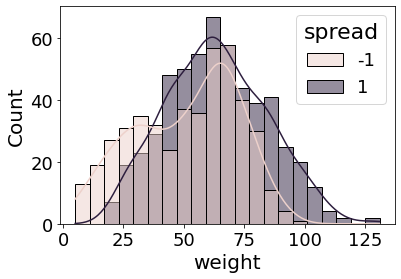

In [64]:
from types import prepare_class
#@title prepare.py
def replace_blood_type_with_bolean(data):
  data["001"]=(data["blood_type"].isin(["A+","A-"])).astype(int)
  data["010"]=(data["blood_type"].isin(["O+","O-"])).astype(int)
  data["100"]=(data["blood_type"].isin(["AB+","AB-","B+","B-"])).astype(int)
def preprare_data(training_data, new_data): 
  # get training set
  trainingSet,testSet=model_selection.train_test_split(training_data, train_size=0.8, test_size=0.2, random_state=69)

  # define what to do with cols
  to_delete=["current_location","symptoms","blood_type","pcr_date"]
  to_standart_norm=["patient_id","num_of_siblings","happiness_score","household_income","conversations_per_day","sugar_levels","PCR_06","PCR_07","PCR_08","PCR_09"]
  to_min_max_norm=["happiness_score","age","sport_activity","PCR_01","PCR_02","PCR_03","PCR_04","PCR_05"]

  #copy to return 
  result_data=new_data.copy()

  #special cases
  replace_blood_type_with_bolean(result_data)
  result_data=pd.concat([result_data,result_data['symptoms'].str.get_dummies(sep=';')],axis=1)
  result_data["sex"].replace({"F": 1, "M": -1}, inplace=True)

  replace_blood_type_with_bolean(trainingSet)
  trainingSet=pd.concat([trainingSet,trainingSet['symptoms'].str.get_dummies(sep=';')],axis=1)
  trainingSet["sex"].replace({"F": 1, "M": -1}, inplace=True)
  #delete
  for col in to_delete:
    del result_data[col]
    del trainingSet[col]
  
  #standart_norm
  standart_scaler=StandardScaler()
  standart_scaler.fit(trainingSet[to_standart_norm])
  result_data[to_standart_norm]=standart_scaler.transform(result_data[to_standart_norm])

  #minmax_norm
  minmax_scaler=MinMaxScaler(feature_range=(-1,1))
  minmax_scaler.fit(trainingSet[to_min_max_norm])
  result_data[to_min_max_norm]=minmax_scaler.transform(result_data[to_min_max_norm])
  return result_data


trainingsetfornoa,testSet=model_selection.train_test_split(virus_data, train_size=0.8, test_size=0.2, random_state=69)

testing=preprare_data(virus_data,trainingsetfornoa)

sns.histplot(data=trainingsetfornoa, x="weight", hue="spread", kde=True)



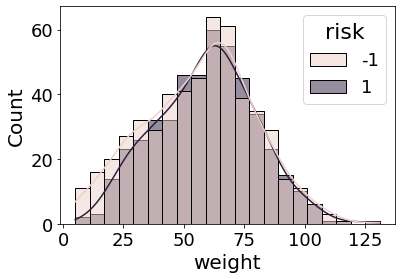

In [66]:
sns.histplot(data=testing, x="weight", hue="risk", kde=True)